In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.insert(0, '../')

In [6]:
from lib.nb_07 import *

### Data

In [7]:
path = datasets.Config().data_path()

In [8]:
path

PosixPath('/Users/vks/.fastai/data')

In [9]:
df = pd.read_csv(path/'questions_easy.csv')
df.head(n=10)

,en,fr
0,What is light ?,Qu’est-ce que la lumière?
1,Who are we?,Où sommes-nous?
2,Where did we come from?,D'où venons-nous?
3,What would we do without it?,Que ferions-nous sans elle ?
4,What is the absolute location (latitude and lo...,Quelle sont les coordonnées (latitude et longi...
5,What is the major aboriginal group on Vancouve...,Quel est le groupe autochtone principal sur l’...
6,What are the advantages and disadvantages of u...,Quels sont les avantages et les désavantages d...
7,What types of land cover are associated with t...,À quel type de couverture des terres associez-...
8,What is the population of Canada?,Quelle est la population du Canada ?
9,Which province is the most populated?,Quelle est la province la plus peuplée ?


In [10]:
def label_txt2txt_sd(sd, proc_x=None, proc_y=None):
    
    #train
    x_train = TextList([x for x, y in sd.train])
    y_train = TextList([y for x, y in sd.train])
    ll_train = LabeledData(x_train, y_train, proc_x=proc_x, proc_y=proc_y)
    
    #train
    x_valid = TextList([x for x, y in sd.valid])
    y_valid = TextList([y for x, y in sd.valid])
    ll_valid = LabeledData(x_valid, y_valid, proc_x=proc_x, proc_y=proc_y)
    
    return SplitData(ll_train,ll_valid)

In [11]:
def get_ll(df):
    
    raw_data = df.to_numpy()
    
    il = TextList(raw_data)
    
    random.seed(42)
    sd = SplitData.split_by_func(il, partial(random_splitter, p_valid=0.05))
    
    proc_x = [TokenizeProcessor(lang="en"), NumericalizeProcessor()]
    proc_y = [TokenizeProcessor(lang="fr"), NumericalizeProcessor()]
    
    return label_txt2txt_sd(sd, proc_x=proc_x, proc_y=proc_y)

In [12]:
ll = get_ll(df)

In [13]:
ll.train.proc_x[-1].otoi = None
ll.train.proc_x[-1].otoi = collections.defaultdict(int,{v:k for k,v in enumerate(ll.train.proc_x[-1].vocab)})

ll.train.proc_y[-1].otoi = None
ll.train.proc_y[-1].otoi = collections.defaultdict(int,{v:k for k,v in enumerate(ll.train.proc_y[-1].vocab)})

In [14]:
(len(ll.train.proc_x[-1].vocab), len(ll.train.proc_x[-1].otoi)), (len(ll.valid.proc_x[-1].vocab), len(ll.valid.proc_x[-1].otoi))

((11580, 11580), (11580, 11580))

In [15]:
(len(ll.train.proc_y[-1].vocab), len(ll.train.proc_y[-1].otoi)), (len(ll.valid.proc_y[-1].vocab), len(ll.valid.proc_y[-1].otoi))

((15147, 15147), (15147, 15147))

In [16]:
(ll.train.proc_x[-1], ll.valid.proc_x[-1]), (ll.train.proc_y[-1], ll.valid.proc_y[-1])

((<lib.nb_05.NumericalizeProcessor at 0x1a2244f2b0>,
  <lib.nb_05.NumericalizeProcessor at 0x1a2244f2b0>),
 (<lib.nb_05.NumericalizeProcessor at 0x1a1e7416d8>,
  <lib.nb_05.NumericalizeProcessor at 0x1a1e7416d8>))

In [17]:
en_vocab = ll.train.proc_x[-1].vocab
fr_vocab = ll.train.proc_y[-1].vocab

In [18]:
len(en_vocab), len(fr_vocab)

(11580, 15147)

In [76]:
idx=15
ll.train.x_obj(idx), ll.train.y_obj(idx)

('xxbos xxmaj what percentage of the xxmaj canadian population is male ? xxeos',
 'xxbos xxmaj quel est le pourcentage d’ hommes au sein de la population canadienne ? xxeos')

In [20]:
def cleanup_ll(ll, length=30):
    "Delets the questions where there length is greater than length"
    for i, (x, y) in enumerate(zip(ll.train.x, ll.train.y)):
        if len(x) > length or len(y) > length:
            del ll.train.x[i]
            del ll.train.y[i]
            
    for i, (x, y) in enumerate(zip(ll.valid.x, ll.valid.y)):
        if len(x) > length or len(y) > length:
            del ll.valid.x[i]
            del ll.valid.y[i]
    
    return ll 

In [21]:
ll = cleanup_ll(ll, length=30)

In [22]:
ll

SplitData
Train: LabeledData
x: TextList (45119 items)
[[2, 7, 10, 14, 1412, 8, 3], [2, 7, 40, 62, 49, 267, 48, 8, 3], [2, 7, 10, 43, 49, 20, 465, 42, 8, 3], [2, 7, 10, 14, 9, 3659, 1070, 50, 4756, 13, 6423, 47, 11, 7, 5713, 17, 7, 2310, 13, 7, 7401, 8, 3], [2, 7, 10, 14, 9, 331, 294, 263, 27, 7, 3324, 7, 2248, 8, 3], [2, 7, 10, 16, 9, 406, 13, 906, 11, 296, 52, 1337, 5714, 1413, 18, 1129, 5714, 8, 3], [2, 7, 10, 154, 11, 538, 955, 16, 407, 39, 9, 2935, 2050, 8, 3], [2, 7, 10, 14, 9, 323, 11, 7, 46, 8, 3], [2, 7, 37, 744, 63, 9, 687, 323, 3482, 8, 3], [2, 7, 37, 744, 14, 9, 838, 7402, 8, 3]...]
Path: .
y: TextList (45119 items)
[[2, 7, 45, 18, 44, 19, 12, 2061, 8, 3], [2, 29, 65, 9212, 11, 62, 8, 3], [2, 7, 19, 11317, 11, 62, 294, 67, 8, 3], [2, 7, 39, 20, 10, 4069, 61, 4593, 14, 7812, 54, 9, 7, 0, 17, 16, 7, 964, 11, 7, 7813, 11, 0, 8, 3], [2, 7, 34, 18, 13, 238, 1300, 667, 38, 27, 2697, 9, 7, 4314, 8, 3], [2, 7, 26, 20, 10, 115, 14, 10, 2601, 35, 177, 32, 6258, 22, 520, 2517, 16, 32,

In [23]:
def seq2seq_collate(samples, pad_idx=1, pad_first=True, backwards=False):
    "Function that collect samples and adds padding. Flips token order if needed"
    #print(samples[0])
    #samples = to_data(samples)
    max_len_x,max_len_y = max([len(s[0]) for s in samples]),max([len(s[1]) for s in samples])
    res_x = torch.zeros(len(samples), max_len_x).long() + pad_idx
    res_y = torch.zeros(len(samples), max_len_y).long() + pad_idx
    if backwards: pad_first = not pad_first
    for i,s in enumerate(samples):
        if pad_first: 
            res_x[i,-len(s[0]):],res_y[i,-len(s[1]):] = torch.LongTensor(s[0]),torch.LongTensor(s[1])
        else:         
            res_x[i,:len(s[0]):],res_y[i,:len(s[1]):] = torch.LongTensor(s[0]),torch.LongTensor(s[1])
    if backwards: res_x,res_y = res_x.flip(1),res_y.flip(1)
    return res_x,res_y

In [24]:
def get_se2seq_dls(ll, train_bs, val_bs, pad_idx=1, pad_first=False, backwards=False, c_fn=seq2seq_collate):
    datasets=[ll.train, ll.valid]
    collate_fn = partial(c_fn, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
    train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0]), bs=bs//2)
    train_dl = DataLoader(datasets[0], batch_size=train_bs, sampler=train_sampler, 
                          collate_fn=seq2seq_collate,drop_last=True)
    
    dataloaders = [train_dl]
    for ds in datasets[1:]:
        lengths = [len(t) for t in ds.x.items]
        sampler = SortSampler(ds.x, key=lengths.__getitem__)
        dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, collate_fn=collate_fn))
        
    return dataloaders

Save labelled data object for later use to save time.

In [78]:
pickle.dump(ll, open('./ll.pkl', 'wb'))

In [79]:
ll = pickle.load( open('./ll.pkl', 'rb'))

In [25]:
bs = 64
train_dl, valid_dl = get_se2seq_dls(ll, bs, bs*2)

def seq2seq_databunch(ll, bs=64):
    return DataBunch(*get_se2seq_dls(ll, bs, bs*2))

data = seq2seq_databunch(ll)

In [26]:
data

In [27]:
x,y = next(iter(data.train_dl))

In [28]:
x.shape, y.shape

(torch.Size([64, 120]), torch.Size([64, 158]))

### Models

##### Pretrained Embeddings

In [29]:
import fastText as ft

In [30]:
emb_path = Path("./../../ft_embedding/")

In [31]:
fr_vecs = ft.load_model(str((emb_path/'cc.fr.300.bin')))
en_vecs = ft.load_model(str((emb_path/'cc.en.300.bin')))

In [32]:
def create_emb(vecs, otoi, em_sz=300, mult=1.):
    emb = nn.Embedding(len(otoi), em_sz, padding_idx=1)
    wgts = emb.weight.data
    vec_dic = {w:vecs.get_word_vector(w) for w in vecs.get_words()}
    miss = []
    count = 0
    for w,i in otoi.items():
        try: wgts[i] = tensor(vec_dic[w])
        except: 
            count +=1
            miss.append(w)
    print(f"Missed Vocab items: {count}, vocab has {(count/len(otoi))*100}% missing tokens")
    return emb, vec_dic, miss

In [33]:
print(f"Encoder has {len(data.train_dl.dataset.proc_x[-1].otoi)} vocab tokens")
print(f"Decoder has {len(data.train_dl.dataset.proc_y[-1].otoi)} vocab tokens")

Encoder has 11580 vocab tokens
Decoder has 15147 vocab tokens


In [34]:
emb_enc, enc_vec_dic, enc_miss_tokens = create_emb(en_vecs, data.train_dl.dataset.proc_x[-1].otoi)
emb_dec, dec_vec_dic, dec_miss_tokens = create_emb(fr_vecs, data.train_dl.dataset.proc_y[-1].otoi)

Missed Vocab items: 624, vocab has 5.3886010362694305% missing tokens
Missed Vocab items: 851, vocab has 5.618274245725226% missing tokens


In [35]:
model_path = Path("./")
os.makedirs(model_path/"models", exist_ok=True)

In [36]:
torch.save(emb_enc, model_path/'models'/'en_emb.pth')
torch.save(emb_dec, model_path/'models'/'fr_emb.pth')

Let's free up some RAM

In [37]:
del fr_vecs
del en_vecs

#### Basic Seq2Seq

In [38]:
from fastai.text.models.qrnn import QRNN, QRNNLayer

![](./../images/seq2seq.png)

In [39]:
data.train_dl.dataset.proc_x[-1].otoi

defaultdict(int,
            {'xxunk': 0,
             'xxpad': 1,
             'xxbos': 2,
             'xxeos': 3,
             'xxrep': 4,
             'xxwrep': 5,
             'xxup': 6,
             'xxmaj': 7,
             '?': 8,
             'the': 9,
             'what': 10,
             'of': 11,
             'to': 12,
             'and': 13,
             'is': 14,
             'in': 15,
             'are': 16,
             ',': 17,
             'a': 18,
             'for': 19,
             'do': 20,
             'why': 21,
             'be': 22,
             'you': 23,
             'who': 24,
             'or': 25,
             '-': 26,
             'on': 27,
             'this': 28,
             'that': 29,
             'have': 30,
             'your': 31,
             'when': 32,
             'can': 33,
             'should': 34,
             'will': 35,
             'does': 36,
             'which': 37,
             'i': 38,
             'with': 39,
             'where':

In [40]:
data.train_dl.dataset.proc_x[-1].otoi['xxbos'], data.train_dl.dataset.proc_x[-1].otoi['xxpad']

(2, 1)

In [41]:
emb_enc.weight.size()

torch.Size([11580, 300])

In [55]:
class Basic_Seq2SeqQRNN(nn.Module):
    
    def __init__(self, emb_enc, emb_dec, n_hid, max_len, n_layers=2, p_inp:float=0.15, p_enc:float=0.25, 
                 p_dec:float=0.1, p_out:float=0.35, p_hid:float=0.05, bos_idx:int=2, pad_idx:int=1):
        
        super().__init__()
        
        self.n_layers,self.n_hid,self.max_len,self.bos_idx,self.pad_idx = n_layers,n_hid,max_len,bos_idx,pad_idx
        
        self.enc_emb = emb_enc
        #self.enc_emb_dp = nn.Dropout(p_inp)
        self.encoder = QRNN(emb_enc.weight.size()[1], n_hid, n_layers=n_layers, dropout=p_enc)
        self.out_enc = nn.Linear(n_hid, emb_enc.weight.size(1), bias=False)
        
        self.hid_dp = nn.Dropout(p_hid)
        
        self.emb_dec = emb_dec
        self.decoder = QRNN(emb_dec.weight.size(1), emb_dec.weight.size(1), n_layers=n_layers, dropout=p_dec)
        self.out_drop = nn.Dropout(p_out)
        self.out = nn.Linear(emb_dec.weight.size()[1], emb_dec.weight.size()[0])
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
        
        bs, sl = inp.size()
        
        self.encoder.reset()
        self.decoder.reset() 
        
        hid = self.initHidden(bs)
        
        emb = self.enc_emb(inp)
        enc_out, hid = self.encoder(emb)
        hid = self.out_enc(self.hid_dp(hid))
        
        dec_inp = inp.new_zeros(bs).long() + self.bos_idx
#         print(f"dec_inp shape: {dec_inp.shape}")
        outs = []
        
        for i in range(self.max_len):
            emb = self.emb_dec(dec_inp).unsqueeze(1)
#             print(f"dec_emb shape: {emb.shape}")
            out, hid = self.decoder(emb, hid)
            out = self.out(self.out_drop(out[:,0]))
            outs.append(out)
            #print(f"out_shape{out.shape}")
            dec_inp = out.max(1)[1]
            if (dec_inp==self.pad_idx).all():
                if not self.training:
                    print(f"reached here: breaking at: {self.max_len}")
                break
        return torch.stack(outs, dim=1)
        
        
    def initHidden(self, bs): return next(self.parameters()).new_zeros(self.n_layers, bs, self.n_hid)

##### verify inps and outs

In [100]:
x,y = next(iter(data.train_dl))
x.shape, y.shape

(torch.Size([64, 120]), torch.Size([64, 158]))

In [101]:
m = Basic_Seq2SeqQRNN(emb_enc, emb_dec, 256, 30, n_layers=2)

In [102]:
outs = m(x)

In [103]:
outs.shape, y.shape

(torch.Size([64, 30, 11580]), torch.Size([64, 158]))

##### seq2seq_loss and seq2seq_acc

In [43]:
def seq2seq_loss(out, targ, pad_idx=1):
    #print(out.shape, targ.shape)
    bs,targ_len = targ.size()
    _,out_len,vs = out.size()
    if targ_len>out_len: out  = F.pad(out,  (0,0,0,targ_len-out_len,0,0), value=pad_idx)
    if out_len>targ_len: targ = F.pad(targ, (0,out_len-targ_len,0,0), value=pad_idx)
    #print(out.shape, targ.shape)
    return cross_entropy_flat(out, targ)

def seq2seq_acc(out, targ, pad_idx=1):
    bs,targ_len = targ.size()
    _,out_len,vs = out.size()
    if targ_len>out_len: out  = F.pad(out,  (0,0,0,targ_len-out_len,0,0), value=pad_idx)
    if out_len>targ_len: targ = F.pad(targ, (0,out_len-targ_len,0,0), value=pad_idx)
    out = out.argmax(2)
    return (out==targ).float().mean()

##### LRFind

In [62]:
emb_enc = torch.load(model_path/'models'/'en_emb.pth')
emb_dec = torch.load(model_path/'models'/'fr_emb.pth')

In [64]:
cbs = [partial(AvgStatsCallback,seq2seq_acc),
       partial(CudaCallback, get_device()), 
       Recorder,
       LR_Find,
       ProgressCallback]

In [65]:
model = Basic_Seq2SeqQRNN(emb_enc, emb_dec, 256, 30, n_layers=2)
learn = Learner(model, data, loss_func=seq2seq_loss, cb_funcs=cbs, opt_func=adam_opt())

torch.save(learn.model.state_dict(), path/"init_model.pth")

In [66]:
learn.fit(1)

epoch,train_loss,train_seq2seq_acc,valid_loss,valid_seq2seq_acc,time


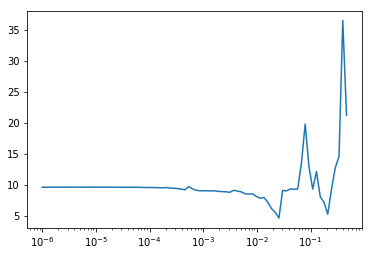

In [69]:
learn.recorder.plot(skip_last=5)

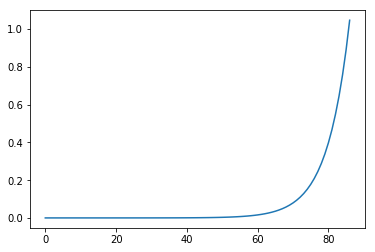

In [68]:
learn.recorder.plot_lr()

##### Training the Model

In [102]:
cbs = [partial(AvgStatsCallback,seq2seq_acc),
       partial(CudaCallback, get_device()), 
       Recorder,
       partial(SaveModelCallback, every="improvement", savename="basic_seq2seq_model"),
       partial(GradientClipping, clip=0.1),
       ProgressCallback]

In [103]:
emb_enc = torch.load(model_path/'models'/'en_emb.pth')
emb_dec = torch.load(model_path/'models'/'fr_emb.pth')

In [104]:
model = Basic_Seq2SeqQRNN(emb_enc, emb_dec, 256, 30, n_layers=2)
learn = Learner(model, data, loss_func=seq2seq_loss, cb_funcs=cbs, opt_func=sgd_mom_opt)
# load the model for which the lr_find was run
#learn.model.load_state_dict(torch.load(path/"init_model.pth", map_location=get_device()))

In [105]:
#export
def cos_1cycle_anneal(start, high, end):
    return [sched_cos(start, high), sched_cos(high, end)]

In [106]:
lr = 1e-2 # 1e-2 #

In [107]:
sched_lr  = combine_scheds([0.3,0.7], cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.8, 0.7, 0.8))
cbsched = [ParamScheduler('lr', sched_lr) ]#, ParamScheduler('mom', sched_mom)]

In [108]:
#learn.fit(1)
learn.fit(3, cbs=cbsched)

epoch,train_loss,train_seq2seq_acc,valid_loss,valid_seq2seq_acc,time
0,9.454783,0.008528,9.205265,0.038033,38:57


Better model found at epoch 0 with valid_loss value: 9.205264616935484.
Loaded the best model found at Epoch:0


KeyboardInterrupt: 

In [ ]:
def get_predictions(learn):
    learn.model.eval()
    inputs, targets, outputs = [],[],[]
    
    with torch.no_grad():
        for xb,yb in progress_bar(learn.data.valid_dl):
            print(f"inps: {xb.shape}")
            out = learn.model(xb)
            print(f"outs: {out.shape}")
            for x in xb:
                inputs.append(learn.data.train_dl.dataset.obj([x],0, learn.data.train_dl.dataset.proc_x))
#                 targets.append(learn.data.train_dl.dataset.obj([y],0, learn.data.train_dl.dataset.proc_y))
#                 outputs.append(learn.data.train_dl.dataset.obj([z.argmax(1)],0, learn.data.train_dl.dataset.proc_y))
                
            for y in yb:
#                 inputs.append(learn.data.train_dl.dataset.obj([x],0, learn.data.train_dl.dataset.proc_x))
                targets.append(learn.data.train_dl.dataset.obj([y],0, learn.data.train_dl.dataset.proc_y))
#                 outputs.append(learn.data.train_dl.dataset.obj([z.argmax(1)],0, learn.data.train_dl.dataset.proc_y))
                
            for z in out:
#                 inputs.append(learn.data.train_dl.dataset.obj([x],0, learn.data.train_dl.dataset.proc_x))
#                 targets.append(learn.data.train_dl.dataset.obj([y],0, learn.data.train_dl.dataset.proc_y))
                outputs.append(learn.data.train_dl.dataset.obj([z.argmax(1)],0, learn.data.train_dl.dataset.proc_y))

    return inputs, targets, outputs

In [ ]:
inputs, targets, outputs = get_predictions(learn)

In [ ]:
seek = 3
inputs[seek], targets[seek], outputs[seek]

In [ ]:
seek = 30
inputs[seek], targets[seek], outputs[seek]

In [ ]:
seek = 300
inputs[seek], targets[seek], outputs[seek]